In [50]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.graphics.gofplots import qqplot


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('file.csv', index_col=None)
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1,1.59,1,12.0,18.050000
1,1,3.30,1,14.5,19.833333
2,1,1.80,2,9.5,10.050000
3,1,0.50,2,3.5,1.866667
4,1,3.00,2,15.0,19.316667
...,...,...,...,...,...
12748455,2,1.00,1,5.5,3.933333
12748456,2,0.80,1,6.0,5.700000
12748457,1,3.40,2,13.5,13.283333
12748458,1,1.30,1,10.5,15.316667


In [3]:
df.describe()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
count,1.274846e+07,1.274846e+07,1.274846e+07,1.274846e+07,1.274846e+07
mean,1.681517e+00,1.345967e+01,1.386693e+00,1.190601e+01,1.417949e+01
std,1.337944e+00,9.844297e+03,4.988574e-01,1.030259e+01,6.493145e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,-4.500000e+02,-1.211017e+03
25%,1.000000e+00,1.000000e+00,1.000000e+00,6.500000e+00,6.100000e+00
50%,1.000000e+00,1.680000e+00,1.000000e+00,9.000000e+00,9.950000e+00
75%,2.000000e+00,3.000000e+00,2.000000e+00,1.350000e+01,1.578333e+01
max,9.000000e+00,1.542000e+07,5.000000e+00,4.008000e+03,5.485556e+05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748460 entries, 0 to 12748459
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   payment_type     int64  
 3   fare_amount      float64
 4   trip_duration    float64
dtypes: float64(3), int64(2)
memory usage: 486.3 MB


In [5]:
df = df[(df['fare_amount'] > 0) & (df['trip_duration'] > 0)]

In [6]:
df.describe()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
count,1.272614e+07,1.272614e+07,1.272614e+07,1.272614e+07,1.272614e+07
mean,1.681971e+00,1.348132e+01,1.385255e+00,1.191217e+01,1.419990e+01
std,1.338432e+00,9.852927e+03,4.971891e-01,1.019066e+01,6.498821e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.000000e+00,1.000000e+00,6.500000e+00,6.116667e+00
50%,1.000000e+00,1.680000e+00,1.000000e+00,9.000000e+00,9.966667e+00
75%,2.000000e+00,3.000000e+00,2.000000e+00,1.350000e+01,1.580000e+01
max,9.000000e+00,1.542000e+07,5.000000e+00,4.008000e+03,5.485556e+05


In [7]:
df['payment_type'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
df.isna().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
trip_duration      0
dtype: int64

In [9]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
413,1,0.8,1,6.5,7.950000
1277,1,1.1,1,7.0,8.416667
1559,1,1.4,1,8.0,9.800000
1860,1,1.1,1,5.5,3.850000
2009,1,0.6,2,4.0,2.516667
...,...,...,...,...,...
12748455,2,1.0,1,5.5,3.933333
12748456,2,0.8,1,6.0,5.700000
12748457,1,3.4,2,13.5,13.283333
12748458,1,1.3,1,10.5,15.316667


In [10]:
(df[df.duplicated()].shape[0]/df.shape[0])*100

62.19701042083542

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(4810861, 5)

In [13]:
df.passenger_count.value_counts(normalize=True)

passenger_count
1    0.522319
2    0.186286
5    0.101893
3    0.075178
6    0.072316
4    0.040728
0    0.001273
9    0.000002
8    0.000002
7    0.000002
Name: proportion, dtype: float64

In [14]:
df.payment_type.value_counts()

payment_type
1    2904255
2    1873828
3      24536
4       8241
5          1
Name: count, dtype: int64

In [15]:
df = df[((df['payment_type'] < 3)
         & (df['passenger_count'] < 6)
         & (df['passenger_count'] > 0)
         & (df['trip_distance'] > 0)
        )]

In [16]:
df.describe()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
count,4.408303e+06,4.408303e+06,4.408303e+06,4.408303e+06,4.408303e+06
mean,1.941316e+00,3.493710e+01,1.392810e+00,1.792412e+01,2.343845e+01
std,1.347542e+00,1.670516e+04,4.883752e-01,1.335066e+01,1.103244e+03
min,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.720000e+00,1.000000e+00,9.500000e+00,1.030000e+01
50%,1.000000e+00,3.150000e+00,1.000000e+00,1.400000e+01,1.603333e+01
75%,2.000000e+00,6.000000e+00,2.000000e+00,2.200000e+01,2.348333e+01
max,5.000000e+00,1.542000e+07,2.000000e+00,4.008000e+03,5.485556e+05


In [17]:
df.payment_type.replace([1,2],['Card','Cash'],inplace=True)

In [18]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1,1.59,Card,12.0,18.050000
1,1,3.30,Card,14.5,19.833333
2,1,1.80,Cash,9.5,10.050000
3,1,0.50,Cash,3.5,1.866667
4,1,3.00,Cash,15.0,19.316667


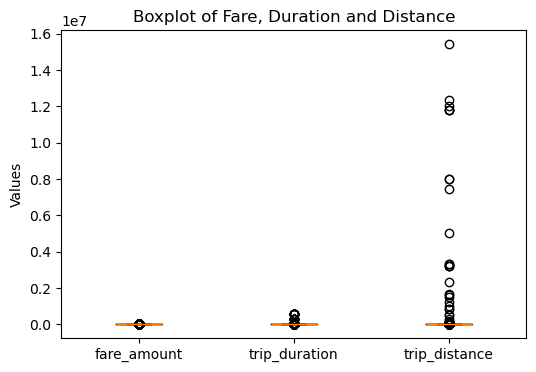

In [19]:
plt.figure(figsize=(6, 4))  # width=6, height=4
plt.boxplot([df['fare_amount'], df['trip_duration'], df['trip_distance']])
plt.xticks([1, 2, 3], ['fare_amount', 'trip_duration', 'trip_distance'])
plt.title("Boxplot of Fare, Duration and Distance")
plt.ylabel("Values")
plt.show()

In [20]:
for col in ['fare_amount', 'trip_duration', 'trip_distance']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q1 + 1.5*IQR
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [21]:
df.shape

(2850224, 5)

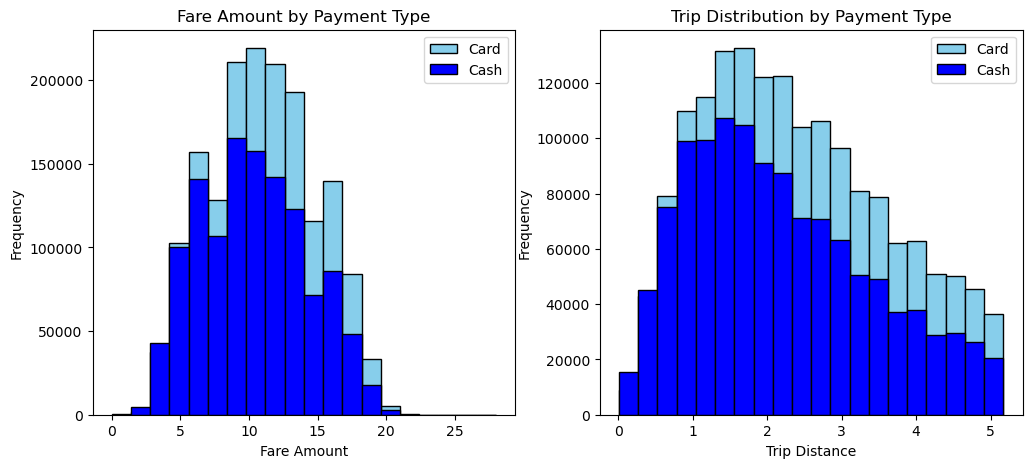

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.hist(df[df['payment_type'] == 'Card']['fare_amount'],
         histtype='barstacked', bins=20, edgecolor='k', color='skyblue', label='Card')

plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'],
         histtype='barstacked', bins=20, edgecolor='k', color='blue', label='Cash')

plt.legend()
plt.title("Fare Amount by Payment Type")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)

plt.hist(df[df['payment_type'] == 'Card']['trip_distance'],
         histtype='barstacked', bins=20, edgecolor='k', color='skyblue', label='Card')

plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'],
         histtype='barstacked', bins=20, edgecolor='k', color='blue', label='Cash')

plt.legend()
plt.title("Trip Distribution by Payment Type")
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.show()


In [23]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           11.075623  3.814098      2.393233  1.230096
Cash           10.399093  3.853505      2.183791  1.217508

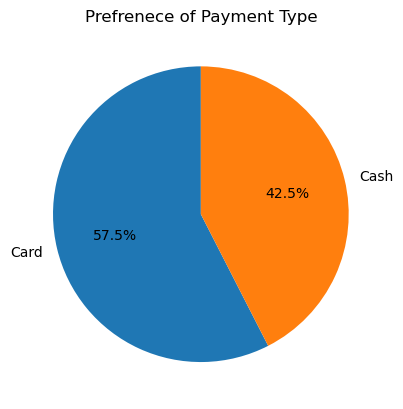

In [24]:
plt.title('Prefrenece of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
       autopct='%1.1f%%',startangle=90)
plt.show()

In [26]:
passenger = df.groupby(['payment_type', 'passenger_count']).size().reset_index(name='count')
passenger


,payment_type,passenger_count,count
0,Card,1,801859
1,Card,2,358113
2,Card,3,162713
3,Card,4,86846
4,Card,5,230064
5,Cash,1,605101
6,Cash,2,259744
7,Cash,3,119565
8,Cash,4,70437
9,Cash,5,155782


In [28]:
passenger['prec'] = (passenger['count'] / passenger['count'].sum())*100
passenger

,payment_type,passenger_count,count,prec
0,Card,1,801859,28.133192
1,Card,2,358113,12.564381
2,Card,3,162713,5.708779
3,Card,4,86846,3.046989
4,Card,5,230064,8.071787
5,Cash,1,605101,21.229945
6,Cash,2,259744,9.113108
7,Cash,3,119565,4.194933
8,Cash,4,70437,2.471279
9,Cash,5,155782,5.465606


In [32]:
tempDF = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
tempDF['payment_type'] = ['Card', 'Cash']
tempDF.iloc[0, 1:] = passenger.iloc[0:5, -1]

In [34]:
tempDF.iloc[1, 1:] = passenger.iloc[5:, -1]

In [35]:
tempDF

,payment_type,1,2,3,4,5
0,Card,28.133192,12.564381,5.708779,3.046989,8.071787
1,Cash,21.229945,9.113108,4.194933,2.471279,5.465606


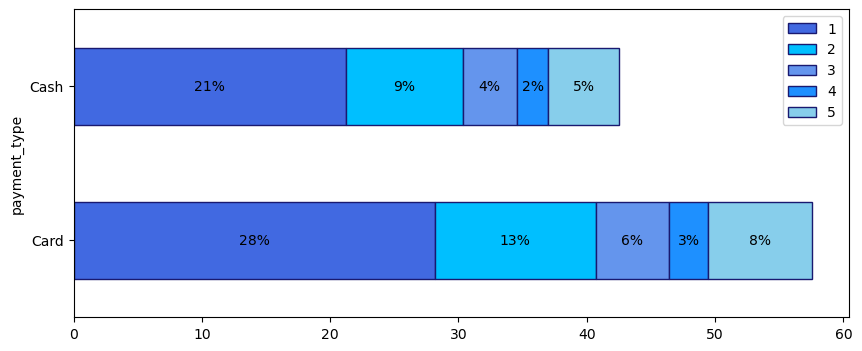

In [49]:
ax = tempDF.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['royalblue', 'deepskyblue', 'cornflowerblue', 'dodgerblue', 'skyblue'],
    edgecolor='midnightblue',
    figsize=(10, 4)
)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(
        x+width/2,
        y+height/2,
        '{:.0f}%'.format(width),
        horizontalalignment='center',
        verticalalignment='center',
    )

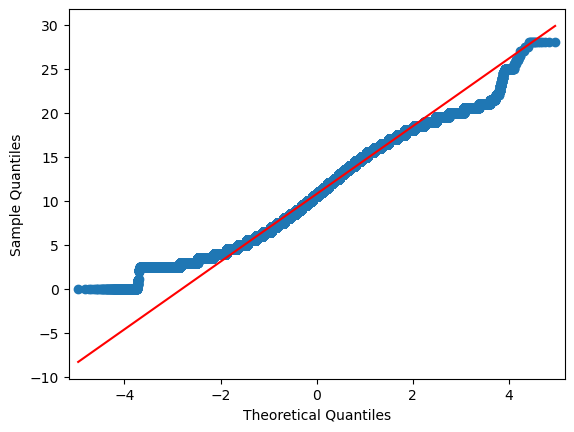

In [51]:
qqplot(df['fare_amount'], line='s')
plt.show()

### Testing Wheter there is difference in Customer base on the Payment or not ?
**Ho** : There is no diff in customer based on the Payment method.<br>
**H1** : There is diff in customer based on the Payment method.


In [55]:
card = df[df['payment_type']=='Card']['fare_amount']
cash = df[df['payment_type']=='Cash']['fare_amount']

In [56]:
t_stats, p_value = st.ttest_ind(a=card, b=cash, equal_var=False)
print('T Statistics:', t_stats, 'P Value:', p_value)

T Statistics: 147.14651802506475 P Value: 0.0


### We observe that P value from T-Test is less than **0.05** which state that there is significant diff btw the Passengers based on the **Payment Type** 

#### **Conclusion : Taxi Drivers should try for Card Payment for more profit**